

# 30 Very Useful Pandas Functions for Everyday Data Analysis Tasks



In [ ]:
import numpy as np
import pandas as pd

## 1. pd.read_csv, pd.read_excel

- The first function to mention is read_csv or read_excel.
- They are used to read a CSV or an excel file to a pandas DataFrame format. 
- Here I am using the read_csv function to read the FIFA dataset:

In [ ]:
df = pd.read_csv("fifa.csv")
df

In [ ]:
df.head().T

In [ ]:
df.tail()

In [ ]:
df.sample(3)

In [ ]:
df_excel = pd.read_excel("Automobile_data_1.xlsx")
df_excel

## 2. df.columns
- When you have a big dataset like that it can be hard to see all the columns. Using .columns function, you can print out all the columns of the dataset:

In [ ]:
df.columns

## 3. df.drop()

- You can drop some unnecessary columns using df.drop(). In this dataset we have so many columns we are not going to use all of them for this tutorial. So, we can easily drop some:

In [ ]:
df.drop(columns=['Unnamed: 0', 'weak_foot', 'real_face'])

In [ ]:
df

In [ ]:
df.drop('Unnamed: 0', axis=1)

In [ ]:
df

In [ ]:
df.drop(0, axis=0)

## 4. .len()
- Provides with the length of the DataFrame. Let’s see an example:

In [ ]:
len(df)

This DataFrame has 16155 rows of data.

## 5. df.query()

- You can filter or query using a boolean expression. I will use ‘shooting’ and ‘passing’ columns for this example. Here I am checking for which rows ‘shooting’ is bigger than ‘passing’.

In [ ]:
df.query("shooting > passing")

In [ ]:
df.query("shooting > passing")[["short_name","shooting", "passing"]]

In [ ]:
df.query("age>30")[['short_name', 'age']]

This will return the rows only where the shooting is bigger than passing.

## 6. df.iloc()

- This function takes as a parameter the rows and column indices and gives you the subset of the DataFrame accordingly. Here I am taking the first 10 rows of data and index 5th to index 10th columns:

In [ ]:
df.iloc[2,4]

In [ ]:
df.iloc[2, [4,5]]

In [ ]:
df.iloc[[2], [4,5]]

In [ ]:
df.iloc[[2,3],[4,5]]

In [ ]:
df.iloc[:10, 5:10]

## 7. df.loc()

- This function does almost the similar operation as .iloc() function. But here we can specify exactly which row index we want and also the name of the columns we want in our subset. Here is an example:

In [ ]:
df.loc[2,'long_name']

In [ ]:
df.loc[[2,3],['long_name','age']]

In [ ]:
df.loc[[3, 10, 14, 23], ['nationality', 'weight_kg', "height_cm"]]

In [ ]:
df.loc[0:3, 'short_name':'age']

Look at the row indices. We only have the 3rd, 10th, 14th, and 23rd rows. On the other hand, for columns, we only have the specified columns.

## 8. df[‘’].dtypes

- Another very basic and widely used functions. Because it is necessary to know the data types of the variables before we dive into the analysis, visualization, or predictive modeling. I am getting the data type of the ‘height_cm’ column using .dtypes function here:

In [ ]:
df.height_cm.dtypes

In [ ]:
df.league_rank.dtypes

In [ ]:
df.dob.dtypes

In [ ]:
df.dtypes

## 9. df.select_dtypes()

- You can select the variables or columns of a certain data type using this function. For example, I want to select the columns with data types ‘int64’ only. Here is how to do that:

In [ ]:
df.select_dtypes(include='int64')

We got all the columns that have the data type ‘int64’. If we use ‘exclude’ instead of ‘include’ in the ‘select_dtypes’ function, we will get the columns that do not have the data type ‘int64’:

In [ ]:
df.select_dtypes(exclude='int64')

Look, the variables are not integers. You may think that the ‘random_col’ column is integers. But if you check its data type, you will see that it looks integers but its data type is different. Please feel free to check.

##  10. df.insert()

- As the name of the function suggests, it inserts a column in the specified position. To demonstrate that I will first create an array of random numbers that have the length of our DataFrame:

In [ ]:
random_col = np.random.randint(100, size=len(df))

I will insert this array as a column in the DataFrame df at column 3 position. Remember, the column index starts from zero.

In [ ]:
df.insert(3, 'random_col', random_col)

In [ ]:
df

Look, the column ‘random_col’ is inserted at position three.

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

In [ ]:
df = pd.read_csv("fifa.csv")

## 11. df[''].cumsum()

- provides the **cumulative sum
- in every row it provides the cumulative sum of all the values of the previous rows.

In [ ]:
df_barcelona = df[df['club_name'] == 'FC Barcelona'][['short_name', 'joined', 'value_eur', 'wage_eur']].sort_values('joined')

df_barcelona

In [ ]:
df_barcelona[['value_eur', 'wage_eur']].cumsum()

In [ ]:
df_barcelona[['tot_value', 'tot_wage']] = df_barcelona[['value_eur', 'wage_eur']].cumsum()
df_barcelona

- we can use cumsum on cases changing by date like confirmed covid cases 

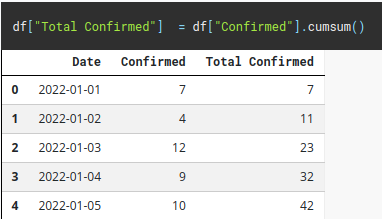

## 12. df.sample()

- takes a representative sample from the dataset


- we can get a certain number of data points

In [ ]:
df.sample(n=10)

- we can get a fraction

In [ ]:
df.sample(frac = 0.01)

## 13. df[''].where()

- This function helps to query a dataset based on a **boolean condition.

In [ ]:
df_incompatible = df[(df['league_rank'] == 1) & (df['overall'] < 47)][['short_name', 'age', 'league_name', 'overall', 'potential']]
df_incompatible

- Entries where `cond` is False are replaced with corresponding value from `other`.

In [ ]:
df_incompatible['overall'].where(df['overall'] > 45, 45, inplace=True)

In [ ]:
df_incompatible

## 14. df[‘’].unique()

- used to find out the unique values of a **categorical column
- Uniques are returned in order of appearance. 
- Data Frames has no unique attribute

In [ ]:
df['league_name'].unique()

## 15. df[''].nunique()

- This function lets you know **how many** unique values do you have in a column. 

In [ ]:
df.nationality.nunique()

In [ ]:
df['league_name'].nunique()

In [ ]:
df[['league_name', 'club_name']].nunique()

- It can be used on the total dataset

In [ ]:
df.nunique()

## 16. df[‘’].rank()

- provides with the rank based on a certain column

In [ ]:
df_rank = df[['short_name', 'overall', 'pace']]
df_rank

In [ ]:
df_rank.rank()

In [ ]:
df_rank['rank'] = df_rank['pace'].rank(ascending=False)
df_rank

In [ ]:
df_rank.sort_values('rank')

## 17. .isin(values)

- Whether each element in the DataFrame or Series is contained in values.

In [ ]:
nation_z = ['Zimbabwe', 'Zambia']
df.nationality.isin(nation_z)

In [ ]:
df[df.nationality.isin(nation_z)][['short_name', 'nationality', 'club_name']]

## 18. df.replace()

- replaces a value with another

In [ ]:
dflg = df[['league_name', 'league_rank']]
dflg

In [ ]:
dflg.replace(1.0, 1.1)

In [ ]:
dflg.replace({1.0: 1.1, 2.0: 2.1, 3.0: 3.1, 4.0:4.1})

## 19. df.rename()

- Rename columns or index labels.

In [ ]:
df10 = df[['short_name', 'club_name', 'league_name']]
df10

In [ ]:
df10.rename(columns = {'short_name':'NAME', 'club_name':'CLUB', 'league_name':'LEAGUE'}, index = {0:'x', 1:'y'})

## 20. .fillna()

- Fill NaN values with a specified value

In [ ]:
df11 = df[['short_name', 'dribbling', 'pace']]
df11

In [ ]:
df11[['pace', 'dribbling']].fillna(0)

In [ ]:
df11[['pace', 'dribbling']].fillna(method='ffill')

In [ ]:
df11[['pace']].fillna(df11[['pace']].mean())

## 21. df.groupby()

This is the most popular function for data summarizing. You can group the data as per a certain variable and find out useful information about those groups. For example, here I am grouping the data by nationality and calculating the total ‘value_eur’ for each nationality:

In [ ]:
df.groupby("nationality")['value_eur'].sum()

In [ ]:
df.groupby("nationality")[['value_eur']].sum()

In [ ]:
df.groupby(['nationality', 'league_rank'])[['value_eur', 'wage_eur']].agg([np.mean, np.median])


## 22. .pct_change()

You can get the percent change from the previous value of a variable. For this demonstration, I will use the value_eur column and get the percent change from the previous for each row of data. The first row will be NaN because there is no value to compare before.

In [ ]:
df.value_eur

In [ ]:
df.value_eur.pct_change()

## 23. df.count()

It provides you the number of data in the DataFrame in the specified direction. When the direction is 0, it provides the number of data in the columns:

In [ ]:
df.count(0)

When the direction is 1, it provides the number of data in the rows:

In [ ]:
df.count(1)

As you can see, each row does not have the same number of data. If you observe the dataset carefully, you will see that it has a lot of null values in several columns.

## 24. df[‘’].value_counts()

We can get the value counts of each category using this function. Here I am getting how many values are there in each league_rank.

In [ ]:
df['league_rank'].value_counts()

In [ ]:
df['league_rank'].value_counts(ascending=True)

## 25. pd.crosstab()

It gives you a frequency table that is a cross-tabulation of two variables. I am making a cross-tabulation of league_rank and international_reputation here:

In [ ]:
pd.crosstab(df['league_rank'], df['international_reputation'])

So, we got the number count of all the combinations of league_rank and international_reputation. We can see that the majority of players have international_reputation and league_rank both 1.

It can be improved further. We can add margins in both directions that will be the total and also we can get the normalized values if necessary:

In [ ]:
pd.crosstab(df['league_rank'], df['international_reputation'], 
            margins = True,
            margins_name="Total",
            normalize = True)

## 26. pd.qcut()

This function bins the data or segments the data based on the distribution of the data. So, we get the range for each player. Here I am going to segment the value_eur in 5 portions and get which player falls in which portion:


In [ ]:
pd.qcut([0,1,2,3,4], q=4)

In [ ]:
pd.qcut([0,1,2,3,4], q = 4).value_counts()

In [ ]:
pd.qcut(df['value_eur'], q = 5)

You can use the value_counts on the above line of code to see how players fall in which range:

In [ ]:
pd.qcut(df['value_eur'], q = 5).value_counts()

As you can see the numbers are pretty close. By default, qcut tries to divide them equally. But in real life, it doesn’t want to be equal always. Because the distribution is not uniform most of the time.

## 27. pd.cut()

Another method for binning. If we want to make 5 bins using cut, it will divide the entire value_eur range into equal five portions and the population in each bin will follow accordingly.

In [ ]:
pd.cut([0,1,2,3,4], bins=4)

In [ ]:
pd.cut([0,1,2,3,4], bins=4).value_counts()

In [ ]:
pd.cut(df['value_eur'], bins = 5).value_counts()

The interval in each range is equal. But the population in each group is very different.


## 28. df[‘’].describe()

This is a great function that provides some basic statistical measures. Here I am using the describe function on the wage_eur column:

In [ ]:
df['wage_eur'].describe()

## 29. nlargest and nsmallest

This gives you the dataset with n number of largest values or smallest values of a specified variable. As an example, I wanted to get the rows with the top 5 wage_eur:

In [ ]:
df.nlargest(5, "wage_eur")

In [ ]:
df.nlargest(5, "wage_eur")[['wage_eur', 'short_name']]

In [ ]:
df.nsmallest(5, "wage_eur")[['wage_eur', 'short_name']]

## 30. df.explode()

Explode can be useful when you have a list of data in some rows. It is hard to analyze, visualize or perform some predictive modeling when you have integers in some columns and lists in some columns. Explode helps to break down those lists. For example, look at this DataFrame:

In [ ]:
df1 = pd.DataFrame({"city": ['A', 'B', 'C'],
                   "day1": [22, 25, 21],
                   'day2':[31, 12, 67],
                   'day3': [27, 20, 15],
                   'day4': [34, 37, [41, 45, 67, 90, 21]],
                   'day5': [23, 54, 36]})
df1

In [ ]:
df1.explode('day4').reset_index(drop=True)